## Telecom Churn Assignment

### Objective:
Evaluate the features of telecom churn dataset and derive the following:
1. Predict high value will churn or not
2. Identify important variables
3. Derive evaluation metrics: accuracy, sensitivity, specificity, precision, recall, ROC (Receiver operating characteristic)
4. Based on customer churn recommend strategies to manage customers 

---
#### GOAL

**Identify important features to determine customer churn and also if the customer will churn or no**

---
#### Problem Statement:
There are multiple features related to usage of different telecom services in the dataset for each customer 

---
#### Steps
<!-- Since we want multiple feature determining relationship with demand/ count, it would require to apply multiple linear regression model -->

---

1. Understand Data
2. Data cleaning - remove outliers, null values, fix data types
3. Data Analysis - Univariate, Bivariate, Multivariate
4. Preprocessing data
5. a. Handle missing values
6. b. Dummy variable creation/ encode categorical variables
7. c. Derive column from other variables
8. Split Data (train set, test set)
9. Scale numerical variables
10. Feature Selection - Random Forest Classifier
11. Model Performance (Assess the model’s performance using metrics such as Accuracy, ROC Curve, AUC, gini_impurity)
12. Making Predictions (Logistic Regression - Random Forest)
13. Model Evaluation (Based on Important features)

##### Import Libraries

In [1]:
#Load the necessary Libraries
import pandas as pd
import numpy as np
# Charts and plots
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
# Warnings library
import warnings #warning
warnings.filterwarnings('ignore')


#Removing display limit of dataframe (optional cell to run)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [2]:
# Load Data from train set
train_set = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

---

### <font color=blue>Feature Engineering</font>


In [3]:
# Replace NaN with 0
train_set.fillna(0, inplace=True)
test_data.fillna(0, inplace=True)

In [4]:
# change object variables to date type (since all object types are date columns)
object_train_columns = train_set.select_dtypes(include=['object']).columns
object_test_columns = test_data.select_dtypes(include=['object']).columns

for col in object_train_columns:
    train_set[col] = pd.to_datetime(train_set[col], errors='coerce')  # Convert to datetime, invalid parsing will be set to NaT
for col in object_test_columns:
    test_data[col] = pd.to_datetime(test_data[col], errors='coerce')  # Convert to datetime, invalid parsing will be set to NaT


In [5]:
# Create new columns from datetime columns
train_set['days_since_last_rech_6'] = (train_set['last_date_of_month_6'] - train_set['date_of_last_rech_6']).dt.days
train_set['days_since_last_rech_7'] = (train_set['last_date_of_month_7'] - train_set['date_of_last_rech_7']).dt.days
train_set['days_since_last_rech_8'] = (train_set['last_date_of_month_8'] - train_set['date_of_last_rech_8']).dt.days

test_data['days_since_last_rech_6'] = (test_data['last_date_of_month_6'] - test_data['date_of_last_rech_6']).dt.days
test_data['days_since_last_rech_7'] = (test_data['last_date_of_month_7'] - test_data['date_of_last_rech_7']).dt.days
test_data['days_since_last_rech_8'] = (test_data['last_date_of_month_8'] - test_data['date_of_last_rech_8']).dt.days

In [6]:
# select all numerical columns for scaling
train_set_numerical = pd.DataFrame(data = train_set.select_dtypes(include = ['int64', 'float64']))
test_set_numerical = pd.DataFrame(data = test_data.select_dtypes(include = ['int64', 'float64']))

# remove NaN
train_set_numerical.fillna(0, inplace=True)
test_set_numerical.fillna(0, inplace=True)


---

### <font color=blue>Train test split </font>

In [7]:
from sklearn.model_selection import train_test_split


X = train_set_numerical.drop(['churn_probability'], axis=1)
y = train_set_numerical['churn_probability']
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

# preserving id columns to be able to recall when creating sample.csv
id_columns = ['id', 'circle_id']

X_train_ids = X_train[id_columns]
X_test_ids = X_test[id_columns]

# remove ID columns for PCA 
X_train = X_train.drop(['id', 'circle_id'], axis=1)
X_test = X_test.drop(['id', 'circle_id'], axis=1)

---
#### <font color=purple>Most of the variables are int/ float and objects are dates therefore:</font>

1. No requirement to create dummy variables since no categorical variables are available
2. Scaling can be used to scale all the feature variables

In [8]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()

In [9]:
# Scale train and test data
train_num_scaled = standard_scaler.fit_transform(X_train)
train_num_scaled = pd.DataFrame(data = train_num_scaled, columns=X_train.columns, index=X_train.index)

test_num_scaled = standard_scaler.transform(X_test)
test_num_scaled = pd.DataFrame(data = test_num_scaled, columns=X_test.columns, index=X_test.index)

# remove NaN values before applying PCA
train_num_scaled.fillna(0, inplace=True)
test_num_scaled.fillna(0, inplace=True)


---

### <font color=blue>Apply PCA on the data</font>

What would PCA acheive?

1. Reduce dimensionality
2. Identify variance in column data
3. Remove noise from data - null data
4. 

In [10]:
from sklearn.decomposition import PCA

pca = PCA(random_state=42)

In [11]:
pca.fit(train_num_scaled)

PCA(random_state=42)

In [12]:
pca.explained_variance_ratio_

array([1.23883239e-01, 9.21848233e-02, 6.13341874e-02, 4.99346864e-02,
       3.68569402e-02, 3.03121693e-02, 2.68688111e-02, 2.41263498e-02,
       2.33834578e-02, 2.08893278e-02, 2.01051072e-02, 1.98530588e-02,
       1.83784974e-02, 1.77915978e-02, 1.65230179e-02, 1.64584405e-02,
       1.47132219e-02, 1.43380908e-02, 1.37652711e-02, 1.29213910e-02,
       1.19824745e-02, 1.09064165e-02, 1.07839877e-02, 1.05509817e-02,
       1.02350738e-02, 9.95417511e-03, 9.69122170e-03, 9.43866909e-03,
       8.35674121e-03, 8.25897769e-03, 7.64329347e-03, 7.46579092e-03,
       7.27992150e-03, 6.70638803e-03, 6.66063844e-03, 6.46041360e-03,
       6.35024284e-03, 6.20641398e-03, 6.04778381e-03, 5.93645560e-03,
       5.80111095e-03, 5.65484343e-03, 5.56436948e-03, 5.43641145e-03,
       5.32062782e-03, 5.21067532e-03, 4.97000547e-03, 4.84993359e-03,
       4.65628560e-03, 4.63825090e-03, 4.49181068e-03, 4.39866269e-03,
       4.17363165e-03, 4.03419522e-03, 3.67522859e-03, 3.59378644e-03,
      

#### <font color=blue> Plot the feature variance in column data</font>

<BarContainer object of 163 artists>

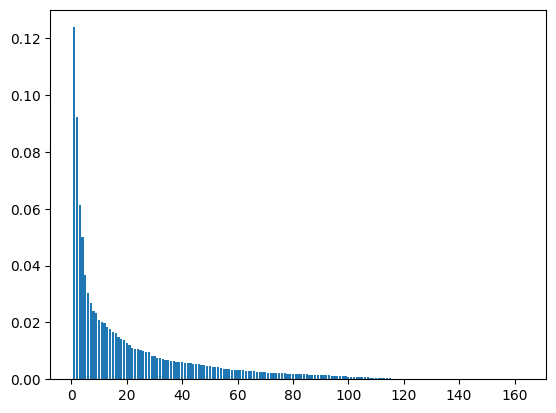

In [13]:
import matplotlib.pyplot as plt

plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

#### <font color=blue>Making the scree plot</font>

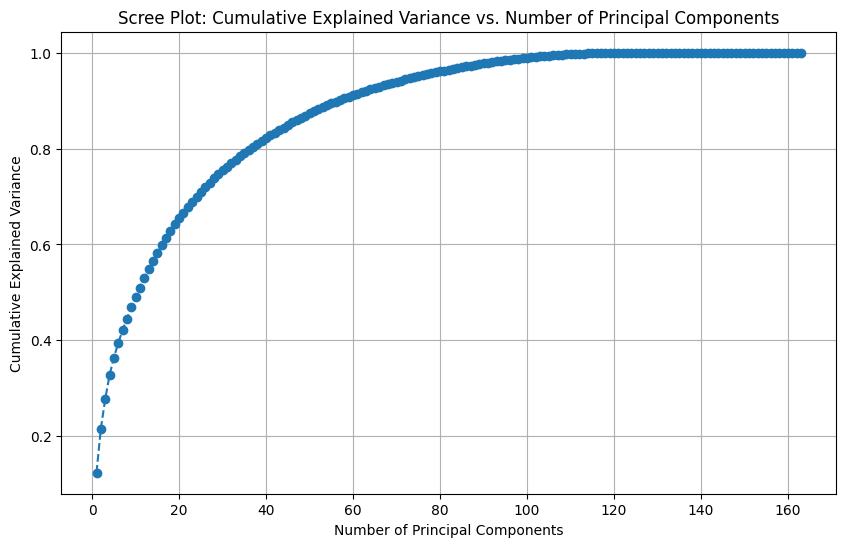

In [14]:
explained_variance = pca.explained_variance_ratio_

# Cumulative explained variance
train_num_scaled_cumulative = explained_variance.cumsum()

# Plot Scree Plot
plt.figure(figsize=(10,6))
plt.plot(range(1, len(explained_variance) + 1), train_num_scaled_cumulative, marker='o', linestyle='--')
plt.title('Scree Plot: Cumulative Explained Variance vs. Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

In [15]:
# Derive number of components explaining 90% variance
n_components = (train_num_scaled_cumulative < 0.90).sum() + 1 

n_components

57

In [16]:
# based on n_components now run PCA
pca2 = PCA(n_components=n_components, random_state=42)

In [17]:
# Run PCA for training and test data set
train_pca_fit = pca2.fit_transform(train_num_scaled)
test_pca_fit = pca2.transform(test_num_scaled)

In [18]:
print('Training data shape: ', train_pca_fit.shape)
print('Test data shape: ', test_pca_fit.shape)

Training data shape:  (55999, 57)
Test data shape:  (14000, 57)


In [19]:
# Convert the dataset to dataframes
train_pca = pd.DataFrame(train_pca_fit, columns=pca2.get_feature_names_out())
test_pca = pd.DataFrame(test_pca_fit, columns=pca2.get_feature_names_out())


--- 

### <font color=blue>Logistic Regression Model</font>

In [20]:
# import relevant libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [21]:
# HyperParameter Tuning for Logistic Regression 
param_grid = {
    'C': [0.1, 1, 10, 100], # value of C is inversely related to regularization
    'penalty': ['l1', 'l2'] # use Lasso or Ridge regularization respectively
}
logistic_regression = LogisticRegression()

grid_search = GridSearchCV(estimator=logistic_regression,
                           param_grid=param_grid,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="accuracy")
best_fit_regression = grid_search.fit(train_pca, y_train)

print("tuned hpyerparameters :(best parameters) ",grid_search.best_params_)
print("accuracy :",grid_search.best_score_)


Fitting 4 folds for each of 8 candidates, totalling 32 fits
tuned hpyerparameters :(best parameters)  {'C': 10, 'penalty': 'l2'}
accuracy : 0.9083554896778341


In [22]:
# run prediction and derive y_pred on training data set
y_train_pred = best_fit_regression.predict(train_pca)


In [23]:
# add the data to a readable Dataframe
y_train_pred_final = pd.DataFrame({'Churn_Actual': y_train, 'Churn_Predicted':y_train_pred})
y_train_pred_final.value_counts()

Churn_Actual  Churn_Predicted
0             0                  49676
1             0                   4514
              1                   1226
0             1                    583
Name: count, dtype: int64

In [24]:
# run prediction and derive y_pred
y_test_pred = best_fit_regression.predict(test_pca)

y_test_pred_final = pd.DataFrame({'Cust_ID': X_test_ids.id, 'Churn_Predicted':y_test_pred})


In [25]:
# transform the actual data - perform null value replacement, predict outcome and export to csv
actual_data_numerical = pd.DataFrame(data = test_data.select_dtypes(include = ['int64', 'float64']))
actual_data_numerical = actual_data_numerical.drop(['id', 'circle_id'], axis=1)
actual_data_numerical.fillna(0, inplace=True)
actual_data_scaled = standard_scaler.transform(actual_data_numerical)
actual_data_scaled = pd.DataFrame(data = actual_data_numerical, columns=actual_data_numerical.columns, index=actual_data_numerical.index)
actual_data_pca_fit = pca2.transform(actual_data_scaled)

actual_data_pred = best_fit_regression.predict(actual_data_pca_fit)
actual_pred_final = pd.DataFrame({'Cust_ID': test_data.id, 'Churn_Predicted':actual_data_pred})
actual_pred_final['Churn_Predicted'].value_counts()


# export predictions to csv
actual_pred_final.to_csv('Sonipriya_Singh_Sonal_Jatav.csv', index=False)


### <font color=blue>Model Evaluation</font>

In [26]:
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    precision_recall_curve,
    roc_curve,
    roc_auc_score
)

In [27]:
# Training data set accuracy based on Logistic Regression Model
train_accuracy = accuracy_score(y_train, y_train_pred)
# Test data set accuracy based on Logistic Regression Model
test_accuracy = accuracy_score(y_test, y_test_pred)

print('Training Data set Accuracy', train_accuracy)
print('Testing Data set Accuracy', test_accuracy)


Training Data set Accuracy 0.9089805175092412
Testing Data set Accuracy 0.9102857142857143


In [28]:
confusion = confusion_matrix(y_train_pred_final.Churn_Actual, y_train_pred_final.Churn_Predicted )
confusion

array([[49676,   583],
       [ 4514,  1226]])

In [29]:
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1score = f1_score(y_test, y_test_pred)
 
print(f"Precision = {precision}")
print(f"Recall = {recall}")
print(f"F1 Score = {f1score}")

Precision = 0.6440677966101694
Recall = 0.21839080459770116
F1 Score = 0.3261802575107296


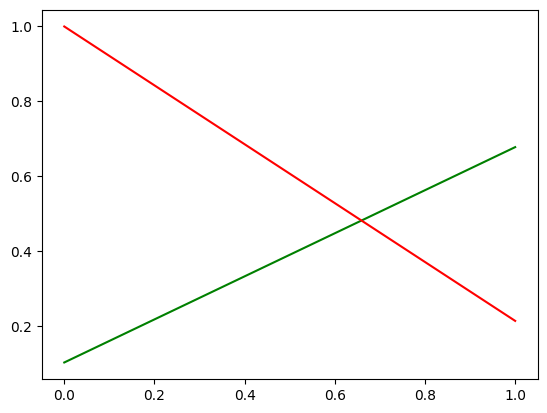

In [30]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn_Actual, y_train_pred_final.Churn_Predicted)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [31]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [32]:
fpr, tpr, thresholds = roc_curve( y_train_pred_final.Churn_Actual, y_train_pred_final.Churn_Predicted, drop_intermediate = False )

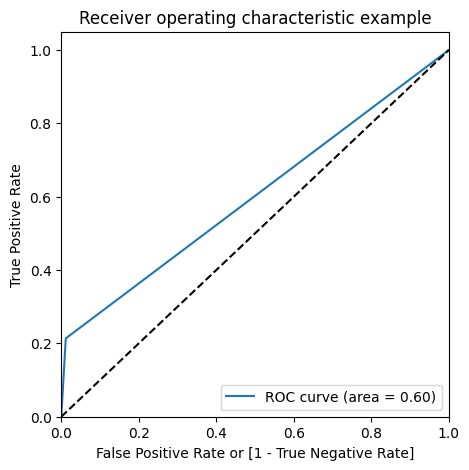

In [33]:
draw_roc(y_train_pred_final.Churn_Actual, y_train_pred_final.Churn_Predicted)

---

## <font color=blue>Derive Important features using RandomForest Classifier</font>

In [34]:
# import relevant libraries
from sklearn.ensemble import RandomForestClassifier

In [35]:
# Hyperparameter tuning using GridSearchCV

params = {
    'max_depth': [10, 20, 30, None],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy'],
    'oob_score': [True],
    'n_estimators': [50, 100, 200]
}

random_forest = RandomForestClassifier()

grid_search_rf = GridSearchCV(estimator=random_forest,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="accuracy")


In [36]:
%%time
# Run the best fitting Random forest hyperparameters
best_fit_rf = grid_search_rf.fit(X_train, y_train)

print("Tuned hpyerparameters: ",grid_search_rf.best_params_)
print('--'*20)
print("Accuracy: ",grid_search_rf.best_score_)

Fitting 4 folds for each of 192 candidates, totalling 768 fits
Tuned hpyerparameters:  {'criterion': 'entropy', 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'n_estimators': 50, 'oob_score': True}
----------------------------------------
Accuracy:  0.9417132728868388
CPU times: user 15.5 s, sys: 3 s, total: 18.5 s
Wall time: 24min 59s


In [37]:
rf_best = grid_search_rf.best_estimator_
print(rf_best)
print('--'*20)

# Printing Accuracy and other metrics
print("Train Accuracy: ", accuracy_score(y_train, rf_best.predict(X_train)))
print("Train Confusion Matrix: ")
print(confusion_matrix(y_train, rf_best.predict(X_train)))
print("-"*20)
print("Test Accuracy: ", accuracy_score(y_test, rf_best.predict(X_test)))
print("Test Confusion Matrix: ")
print(confusion_matrix(y_test, rf_best.predict(X_test)))

RandomForestClassifier(criterion='entropy', max_depth=30, min_samples_leaf=5,
                       n_estimators=50, oob_score=True)
----------------------------------------
Train Accuracy:  0.9643922212896658
Train Confusion Matrix: 
[[49826   433]
 [ 1561  4179]]
--------------------
Test Accuracy:  0.9452142857142857
Test Confusion Matrix: 
[[12398   210]
 [  557   835]]


In [38]:
# Gini and Entropy values

results = pd.DataFrame(grid_search_rf.cv_results_)

# Filter the results for the gini and entropy criteria
gini_results = results[results['param_criterion'] == 'gini']
entropy_results = results[results['param_criterion'] == 'entropy']

# Print the mean test accuracy for each criterion
print("Gini Mean Accuracy: ", gini_results['mean_test_score'].mean())
print("Entropy Mean Accuracy: ", entropy_results['mean_test_score'].mean())

Gini Mean Accuracy:  0.9411263900200993
Entropy Mean Accuracy:  0.9412478588766119


In [39]:
# List the important features
rf_best.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.84429689e-03,
       9.42863672e-03, 1.78085406e-02, 5.56617608e-03, 7.08087226e-03,
       2.57069854e-02, 6.10103597e-03, 6.26533467e-03, 1.87898831e-02,
       2.35589017e-03, 3.58770673e-03, 1.35521593e-02, 2.03818008e-03,
       3.59273125e-03, 2.13632935e-02, 4.84734498e-03, 8.64790148e-03,
       2.66825189e-02, 5.56893563e-03, 5.24065636e-03, 3.72635579e-02,
       2.36250568e-03, 1.87074413e-03, 3.56186759e-03, 1.35065545e-03,
       1.55478952e-03, 1.40192990e-03, 5.62568307e-03, 5.16661923e-03,
       4.24849031e-02, 4.29591732e-03, 3.74674566e-03, 2.87238084e-03,
       4.38144956e-03, 4.31241175e-03, 5.08220130e-03, 5.37711529e-04,
       2.91596816e-04, 2.42192385e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.75631810e-03, 6.91409575e-03, 1.33871835e-02,
       3.86809977e-04, 6.61110561e-04, 6.41641753e-04, 2.60996165e-03,
       4.12018756e-03, 5.65593658e-03, 1.45367710e-03, 0.00000000e+00,
      

#### <font color=purple>Based on important features run the model</font>

In [40]:
# Check if features derived after threshold value derives accuracy similar to what we acheived during Logistic regression
feature_importance_df = pd.DataFrame({
    "Variable_Name": X_train.columns,
    "Feature_Importance": rf_best.feature_importances_
})
print('List of Feature Importance', feature_importance_df.sort_values(by='Feature_Importance', ascending=False))

threshold = 0.01
important_features = feature_importance_df[feature_importance_df['Feature_Importance'] > threshold]


List of Feature Importance               Variable_Name  Feature_Importance
59           total_og_mou_8            0.061149
71             loc_ic_mou_8            0.054682
65         loc_ic_t2m_mou_8            0.050153
89           total_ic_mou_8            0.047685
62         loc_ic_t2t_mou_8            0.044744
32             loc_og_mou_8            0.042485
23         loc_og_t2m_mou_8            0.037264
110      last_day_rch_amt_8            0.028292
20         loc_og_t2t_mou_8            0.026683
8               onnet_mou_8            0.025707
17            roam_og_mou_8            0.021363
11             offnet_mou_8            0.018790
5                    arpu_8            0.017809
104        total_rech_amt_8            0.017241
70             loc_ic_mou_7            0.017182
162  days_since_last_rech_8            0.015643
107          max_rech_amt_8            0.015300
68         loc_ic_t2f_mou_8            0.014874
88           total_ic_mou_7            0.013713
14           

In [41]:

# Filter out unimportant features from your dataset
X_train_important = X_train[important_features['Variable_Name']]
X_test_important = X_test[important_features['Variable_Name']]

# Retrain RandomForest on the important features only
rf_best_train = rf_best.fit(X_train_important, y_train)

# Predict on the train set with important features
y_train_rf_pred = rf_best_train.predict(X_train_important)

# Predict on the test set with important features
y_test_rf_pred = rf_best_train.predict(X_test_important)

# Calculate accuracy for the train set
train_accuracy = accuracy_score(y_train, y_train_rf_pred)

# Calculate accuracy for the test set
test_accuracy = accuracy_score(y_test, y_test_rf_pred)

print("Important features - Train Accuracy: ", train_accuracy)
print("Important features - Test Accuracy: ", test_accuracy)

Important features - Train Accuracy:  0.9572492365935106
Important features - Test Accuracy:  0.944


<h2><font color=blue> [Conclusion] - High Value Customers </font></h2>

In [42]:
# Append the predictions to test set
X_test_important['Churn_predicted'] = y_test_rf_pred

In [43]:

print('--'*15, ' Mean of features where Customer Churned ', '--'*15)
mean_arpu_8_Churned = X_test_important[X_test_important['Churn_predicted'] == 1][important_features['Variable_Name']].mean()
print(mean_arpu_8_Churned.sort_index())

print('\n', '--'*15, ' Mean of features where Customer did not Churn ', '--'*15)
mean_arpu_8_NOTChurned = X_test_important[X_test_important['Churn_predicted'] == 0][important_features['Variable_Name']].mean()
print(mean_arpu_8_NOTChurned.sort_index())

------------------------------  Mean of features where Customer Churned  ------------------------------
arpu_8                     38.766078
days_since_last_rech_8      6.670476
last_day_rch_amt_8          7.705714
loc_ic_mou_7               33.630790
loc_ic_mou_8                0.607714
loc_ic_t2f_mou_8            0.001838
loc_ic_t2m_mou_7           21.139448
loc_ic_t2m_mou_8            0.453400
loc_ic_t2t_mou_8            0.152276
loc_og_mou_8                0.660343
loc_og_t2m_mou_8            0.499629
loc_og_t2t_mou_8            0.158019
max_rech_amt_8             16.588571
offnet_mou_8               15.748086
onnet_mou_8                13.596333
roam_ic_mou_8              13.157762
roam_og_mou_8              16.585676
std_ic_mou_8                0.260790
std_og_mou_8               12.153124
total_ic_mou_7             50.243229
total_ic_mou_8              0.914886
total_og_mou_7            165.382390
total_og_mou_8             12.904038
total_rech_amt_8           33.972381
dtype: f

<h2><font color=darkgreen> [Conclusion] - High Value customers based on important features </font></h2>
<article><font color=green>Important features were derived using <b>RandomForest Classifier</b></font></article>

<b><i>Following are high value customers compared to churned and not churned customers</i></b>

1. **AON** - Higher average Age on network
2. **arpu_8** - Average revenue per user for August month is higher
3. **loc_ic_mou_8 loc_og_mou_8 loc_og_t2m_mou_8 loc_og_t2t_mou_8** - Local incoming and outgoing calls on and off network are much higher for the month of August stating frequent usage for calling
4. **max_rech_amt_8 total_rech_amt_8** - Maximum and total recharge amounts are higher stating that they actively use the network
5. **std_ic_mou_8** - Relatively higher std incoming calls means roaming coverage

<b>Based on above marketing strategies can be introduced for high value customers</b>

1. **AON** - Define a threshold of age on network and reward with shopping voucher accordingly and also target next threshold and amount of shopping voucher that they could earn
2. **arpu_8** - Higher Average revenue can be rewarded with customer specific lower rate or telecom packages with add-ons like data plan/ OTT subscriptions
3. **loc_ic_mou_8 loc_og_mou_8 loc_og_t2m_mou_8 loc_og_t2t_mou_8** - Unlimited call plans with added roaming benefits can be introduced
4. **max_rech_amt_8 total_rech_amt_8** - can be rewarded with family plan packs and add on plans
5. **std_ic_mou_8** - Unlimited call/ data plans with added roaming benefits can be introduced


<h2><font color=darkgreen> [Conclusion] - Important features </font></h2>
<article><font color=green>Important features were derived using <b>RandomForest Classifier</b></font></article>

1. **loc_ic_mou_8** - Local calls  within same telecom circle - Incoming calls - Minutes of usage  voice calls - During August Month
2. **loc_ic_t2m_mou_8** - Local calls  within same telecom circle - Incoming calls - Operator T to other operator mobile - Minutes of usage  voice calls
3. **total_ic_mou_8** - Total Incoming calls - Minutes of usage  voice calls - During August Month
4. **total_og_mou_8** - Total Outgoing calls - Minutes of usage  voice calls - During August Month
5. **loc_og_mou_8** - Local calls  within same telecom circle - Outgoing calls - Minutes of usage  voice calls - During August Month
6. **loc_og_t2m_mou_8** - Local calls  within same telecom circle - Outgoing calls - Operator T to other operator mobile - Minutes of usage  voice calls - During August Month
7. **loc_ic_t2t_mou_8** - Local calls  within same telecom circle - Incoming calls - Operator T to T ie within same operator mobile to mobile - Minutes of usage  voice calls - During August Month
8. **arpu_8** - Average revenue per user - During August Month
9. **max_rech_amt_8** - Maximum - Recharge - Amount - During August Month
10. **offnet_mou_8** - All kind of calls outside the operator T network - Minutes of usage  voice calls - During August Month
11. **loc_og_t2t_mou_8** - Local calls  within same telecom circle - Outgoing calls - Operator T to T ie within same operator mobile to mobile - Minutes of usage  voice calls - During August Month
12. **onnet_mou_8** - All kind of calls within the same operator network - Minutes of usage  voice calls - During August Month
13. **last_day_rch_amt_8** - Last Day Recharge amount - During August Month
14. **total_rech_amt_8** - Total Recharge amount - During August Month
15. **loc_ic_mou_7** - Local calls  within same telecom circle - Incoming calls - Minutes of usage  voice calls - During August July
16. **std_ic_mou_8** - STD calls  outside the calling circle - Incoming calls - Minutes of usage  voice calls - During August August
17. **AON** - Age on network number of days

<h2><font color=green> [Conclusion] - Metrics </font></h2>

<i>Since the metric of importance was <b>Accuracy</b>, while doing hyperparameter tuning scoring='accuracy' was provided  </i>

<h3>Logistic Regression</h3>
<ol>
    <font color=teal><li><b>Accuracy(Training Data): </b>0.9089805175092412</li>
    <li><b>Accuracy(Test Data): </b>0.9102857142857143</li></font>
    <li><b>Precision: </b>0.6440677966101694</li>
    <li><b>F1 Score: </b>0.3261802575107296</li>
    <li><b>AUC: </b>61</li>
</ol>
<article>
    <b><i>Conclusion:</i></b>
    <ul>
        <li>Since accuracy for train and test data is marginally(0.01) apart, the model is a good fit </li>
        <li>AUC: Low AUC means the model performs slightly better than random probability(0.5). To overcome this:  </li>
    </ul>
</article>

---

<h3>Random Forest</h3>
<ol>
    <font color=teal><li><b>Accuracy(before feature importance): </b>0.9417489884481545</li>
    <li><b>Accuracy(on important features): 0.9089805175092412</b></li></font>
    <li><b>Gini mean score: </b>0.9411513161999879</li>
    <li><b>Entropy mean score: </b>0.9412052603167446</li>
</ol>
<article>
    <b><i>Conclusion:</i></b>
    <ul>
        <li>Since accuracy for train and test data is marginally(0.01) apart, the model is a good fit </li>
        <li>AUC: Low AUC means the model performs slightly better than random probability(0.5)</li>
    </ul>
</article>

--- 
<br/>
<h4><p>Both the models showed low AUC</p></h4>
 To overcome this: 
<ul>
    <li>Feature Engineering - remove correlated features, feature transformation</li>
    <li>Feature Scaling - Standard/ Min Max</li>
    <li>Apply more complex models - SVM, Gradient Boosting</li>
    <li>Regularization</li>
    <li>Hyperparameter tuning</li>
    <li>Cross validation</li>
    <font color=grey><i>Since Accuracy was the metric of importance here, skipping above steps </i></font>
</ul>

---

<h3>Model with only Important features</h3>
<ul>
    <li><b>Important features - Train Accuracy: </b> 0.9852675940641797</li>
    <li><b>Important features - Test Accuracy: </b> 0.9435</li>
</ul>


---

<h2><font color=green> [Conclusion] - High Value Customers </font></h2>
<ul>
    <li><b>Important features - Train Accuracy: </b> 0.9852675940641797</li>
    <li><b>Important features - Test Accuracy: </b> 0.9435</li>
</ul>